Observable Trends

* The temperature is maximum at 0 degree latitude (at the equator) and reduces as we move away from the equator.
* The wind speed is less near the equator. It increases as we move away.
* The weather is highly humid near the equator but reduces as we move away from the equator.
* The cloudiness is less near to the equator but its more cloudy as we move away from the equator!
* Apart from Latitude ,there are so many other factors that affect the above weather variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from citipy import citipy
from datetime import datetime
import random
gkey='acd555755ff5c8ccbb0e1e53288ddb08'

In [2]:
# generate random 500 latitude and longitude values
lat = np.random.uniform(low=-90, high=90, size=(1400,))
lon = np.random.uniform(low=-180, high=180, size=(1400,))

weather_df = pd.DataFrame({"Lat": lat,"Lon":lon})
weather_df["City"]=""
weather_df["Country Code"]=""
weather_df["Max Temp"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind Speed"]=""
weather_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-61.250651,-91.603767,,,,,,
1,-73.398000,-137.254028,,,,,,
2,70.424856,83.923431,,,,,,
3,-85.726240,-40.603331,,,,,,
4,17.338049,-12.147164,,,,,,


In [3]:
# Genearte cities list

for index,row in weather_df.iterrows():
    
    city = citipy.nearest_city(row['Lat'],row['Lon'])
    city_name = city.city_name
    city_country_code = city.country_code
    
    weather_df.set_value(index,"City",city_name)
    weather_df.set_value(index,"Country Code",city_country_code)
    
# creating a list of unique number of cities
# dropping the duplicates and keeping the first city name
weather_unique_df = weather_df.drop_duplicates(['City'], keep='first')

# number of unique cities in the list
len(weather_unique_df)

593

In [4]:
# Perform API Calls

print('Beginning Data Retrieval')
print('-----------------------------')

for index,row in weather_unique_df.iterrows():
   
    print(f'Processing Record {index} | {row["City"]}')
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&APPID=%s" %(row["City"].replace(" ","+"), gkey)

    resp = requests.get(target_url).json()
 
    try:
        weather_unique_df.set_value(index,"Max Temp",resp["main"]["temp"])
        weather_unique_df.set_value(index,"Humidity",resp['main']['humidity'])
        weather_unique_df.set_value(index,"Cloudiness",resp['clouds']['all'])
        weather_unique_df.set_value(index,"Wind Speed",resp['wind']['speed'])
        
    except KeyError:
        print("oops !! missing values")
        
print("--------------------------")    
print("Data Retrieval Complete!")
print("--------------------------")
#weather_unique_df.head()


Beginning Data Retrieval
-----------------------------
Processing Record 0 | punta arenas
Processing Record 1 | rikitea
Processing Record 2 | karaul
oops !! missing values
Processing Record 3 | ushuaia
Processing Record 4 | maghama
oops !! missing values
Processing Record 5 | illoqqortoormiut
oops !! missing values
Processing Record 6 | laguna
Processing Record 7 | conceicao da barra
Processing Record 8 | saint anthony
Processing Record 9 | aripuana
Processing Record 10 | lewistown
Processing Record 11 | mahebourg
Processing Record 12 | grand river south east
oops !! missing values
Processing Record 13 | bredasdorp
Processing Record 14 | bluff
Processing Record 15 | sitka
Processing Record 16 | georgetown
Processing Record 17 | port elizabeth
Processing Record 18 | qasigiannguit
Processing Record 19 | whyalla
Processing Record 20 | hamilton
Processing Record 23 | cabo san lucas
Processing Record 24 | mataura
Processing Record 25 | oktyabrskiy
Processing Record 28 | zhangjiakou
Processi

Processing Record 372 | porto novo
Processing Record 375 | solano
Processing Record 377 | antibes
Processing Record 379 | bethel
Processing Record 382 | enumclaw
Processing Record 385 | tuktoyaktuk
Processing Record 386 | kabin buri
Processing Record 387 | coromandel
Processing Record 388 | luderitz
Processing Record 390 | mogadishu
Processing Record 392 | puranpur
Processing Record 396 | port moresby
Processing Record 397 | kysyl-syr
Processing Record 400 | saint-francois
Processing Record 402 | yoichi
Processing Record 403 | malakal
oops !! missing values
Processing Record 404 | lixourion
Processing Record 409 | khandbari
Processing Record 411 | aktash
oops !! missing values
Processing Record 414 | hilo
Processing Record 416 | shagonar
Processing Record 418 | la ronge
Processing Record 420 | norrtalje
Processing Record 423 | kibuye
Processing Record 425 | campbeltown
Processing Record 427 | murray bridge
Processing Record 429 | lolua
oops !! missing values
Processing Record 431 | yun

Processing Record 937 | bria
Processing Record 947 | stowe
Processing Record 950 | praia
Processing Record 953 | viedma
Processing Record 955 | el faiyum
oops !! missing values
Processing Record 957 | tura
Processing Record 959 | taltal
Processing Record 965 | areka
Processing Record 970 | klaksvik
Processing Record 971 | baoshan
Processing Record 974 | alofi
Processing Record 975 | sarangarh
Processing Record 976 | alexandria
Processing Record 977 | omsukchan
Processing Record 978 | bathurst
Processing Record 983 | ballina
Processing Record 984 | gardan diwal
oops !! missing values
Processing Record 985 | uribia
Processing Record 990 | mungwi
Processing Record 992 | yagodnoye
Processing Record 993 | conceicao do coite
Processing Record 995 | moba
Processing Record 997 | coahuayana
Processing Record 1003 | caningay
Processing Record 1013 | nanortalik
Processing Record 1014 | ostersund
Processing Record 1016 | ushibuka
Processing Record 1021 | camana
oops !! missing values
Processing Re

In [5]:
# replacing the empty spaces with NaN values
weather_clean_df = weather_unique_df.replace(r'\s+', np.nan).replace('',np.nan)

In [6]:
# Dropping the rows with NaN values
weather_clean_df = weather_clean_df.dropna(how='any')
weather_clean_df = weather_clean_df.round({"Lat":2,"Lon":2})
weather_clean_df.reset_index()
#  display the dataframe with retrieved Data

weather_clean_df.to_csv('weatherAPI.csv',index=False)
weather_clean_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-61.25,-91.60,punta arenas,cl,52.65,91.0,40.0,35.57
1,-73.40,-137.25,rikitea,pf,79.55,100.0,80.0,15.48
3,-85.73,-40.60,ushuaia,ar,48.60,70.0,40.0,27.51
6,-31.56,-41.97,laguna,br,84.20,14.0,20.0,10.29
7,-18.76,-38.77,conceicao da barra,br,82.38,82.0,76.0,18.72


In [7]:
# making sure, we have 500+ cities in our data frame
weather_clean_df.count()

Lat             531
Lon             531
City            531
Country Code    531
Max Temp        531
Humidity        531
Cloudiness      531
Wind Speed      531
dtype: int64

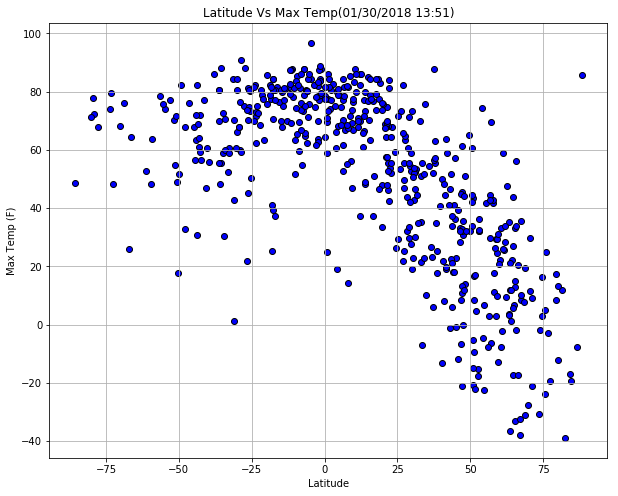

In [8]:
#scatter plots
#Latitude vs Temperature PLot

Lat = weather_clean_df["Lat"].tolist()
temp = weather_clean_df["Max Temp"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=temp,marker="o",facecolors="blue",edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Latitude Vs Max Temp({datetime.now().strftime('%m/%d/%Y %H:%M')})")
fig.savefig('Max_Temp.png', dpi=fig.dpi)

plt.show()

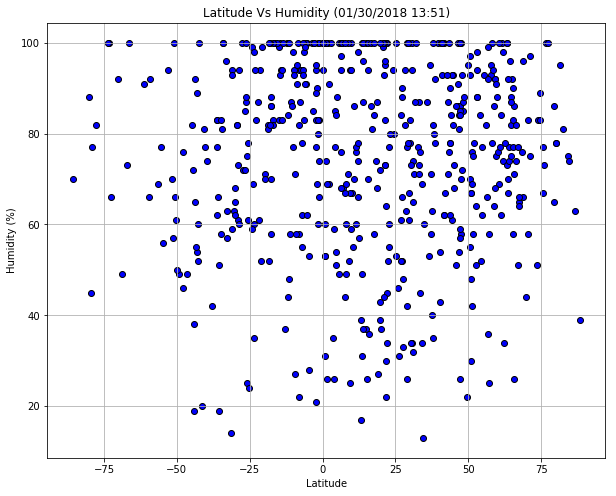

In [9]:
#Latitude Vs Humidity PLot

Lat = weather_clean_df["Lat"].tolist()
hum = weather_clean_df["Humidity"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=hum,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
fig.savefig('humidity.png', dpi=fig.dpi)

plt.show()

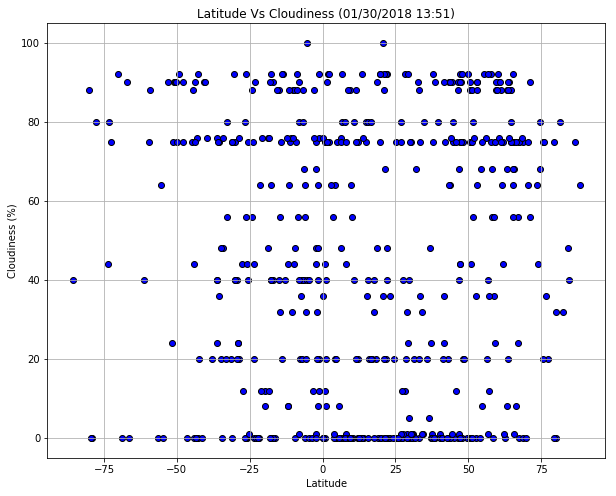

In [10]:
#Latitude Vs Cloudiness Plot

Lat = weather_clean_df["Lat"].tolist()
cloud = weather_clean_df["Cloudiness"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=cloud,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
fig.savefig('cloudy.png', dpi=fig.dpi)

plt.show()

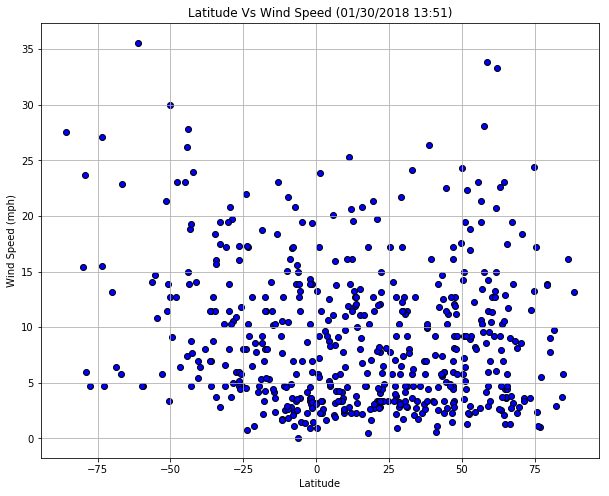

In [11]:
#Latitude vs Wind Speed plot

Lat = weather_clean_df["Lat"].tolist()
wind = weather_clean_df["Wind Speed"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=wind,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
fig.savefig('wind_speed.png', dpi=fig.dpi)

plt.show()